In [65]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [66]:
img=cv2.imread(r"C:\Users\Pranshu Saini\Desktop\Picture1.jpg")


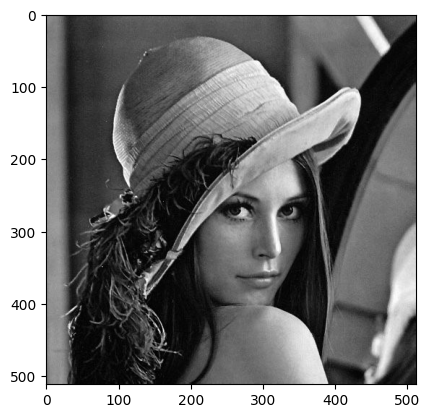

In [67]:
plt.imshow(img)
plt.show()

In [68]:
img.shape

(512, 512, 3)

In [69]:
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


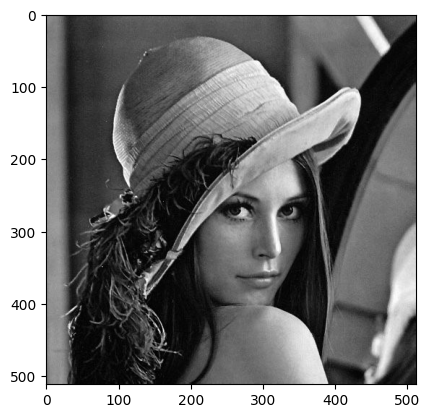

In [70]:
plt.imshow(img_rgb)
plt.show()

In [71]:
img_rgb.shape

(512, 512, 3)

In [72]:
img_gray=cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)

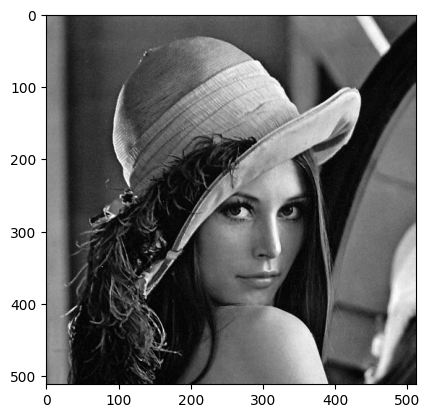

In [84]:
plt.imshow(img_gray, cmap='gray')
plt.show()

In [85]:
img_gray.shape

(512, 512)

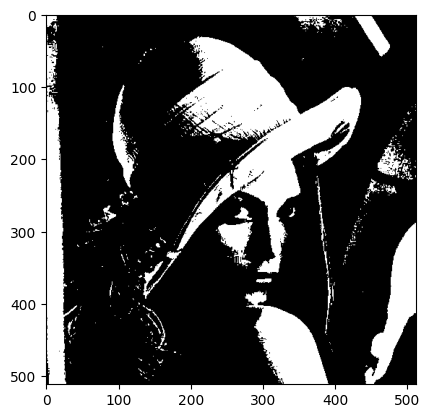

In [86]:
thresold=128
_,img_binary=cv2.threshold(img_gray,thresold,255,cv2.THRESH_BINARY)
plt.imshow(img_binary,cmap='gray')
plt.show()

In [87]:
black_pixel_area = np.sum(img_binary == 0) 
print(f"Area of black pixels: {black_pixel_area}")

Area of black pixels: 200658


In [88]:
img_binary.shape

(512, 512)

In [89]:
#task2

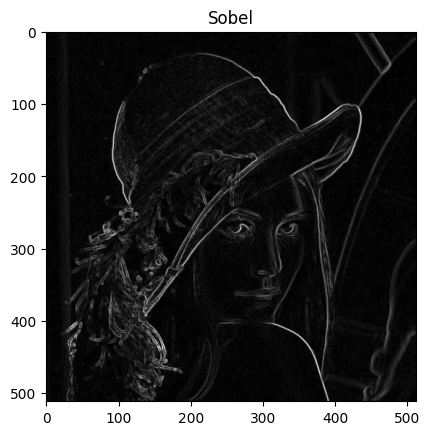

In [90]:
sobel_x = cv2.Sobel(img_gray, cv2.CV_32F, 1, 0, ksize=3)  
sobel_y = cv2.Sobel(img_gray, cv2.CV_32F, 0, 1, ksize=3)  
sobel_edge = cv2.magnitude(sobel_x, sobel_y)  
plt.imshow(sobel_edge,cmap='gray')
plt.title("Sobel")
plt.show()

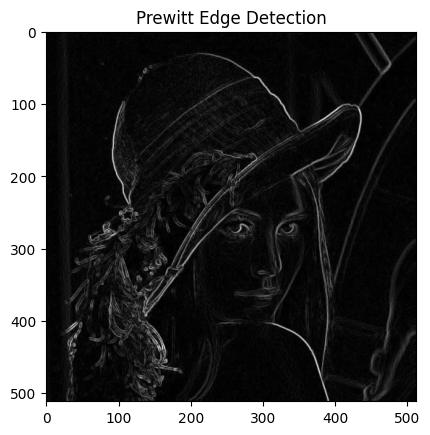

In [91]:
prewitt_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
prewitt_x_edge = cv2.filter2D(img_gray, cv2.CV_32F, prewitt_x)
prewitt_y_edge = cv2.filter2D(img_gray, cv2.CV_32F, prewitt_y)
prewitt_edge = cv2.magnitude(prewitt_x_edge, prewitt_y_edge)
plt.imshow(prewitt_edge, cmap='gray')
plt.title("Prewitt Edge Detection")
plt.show()


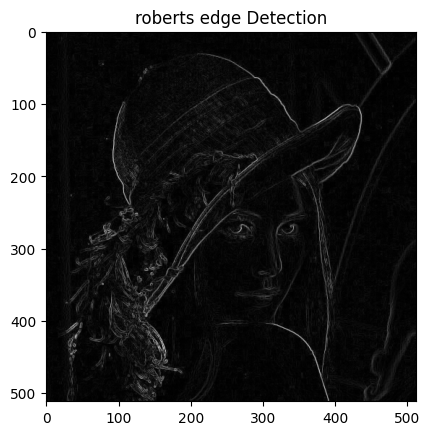

In [92]:
roberts_cross_x = np.array([[1, 0], [0, -1]])
roberts_cross_y = np.array([[0, 1], [-1, 0]])

# Apply Roberts cross operator filters
roberts_x_edge = cv2.filter2D(img_gray, cv2.CV_32F, roberts_cross_x)
roberts_y_edge = cv2.filter2D(img_gray, cv2.CV_32F, roberts_cross_y)
roberts_edge = cv2.magnitude(roberts_x_edge, roberts_y_edge)
plt.imshow(roberts_edge, cmap='gray')
plt.title("roberts edge Detection")
plt.show()


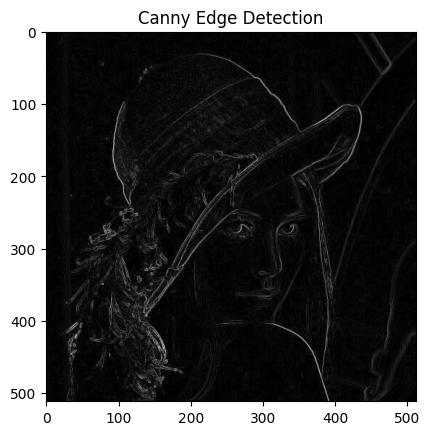

In [93]:
canny_edge = cv2.Canny(img_gray, 100, 200) 
plt.imshow(roberts_edge, cmap='gray')
plt.title("Canny Edge Detection")
plt.show()


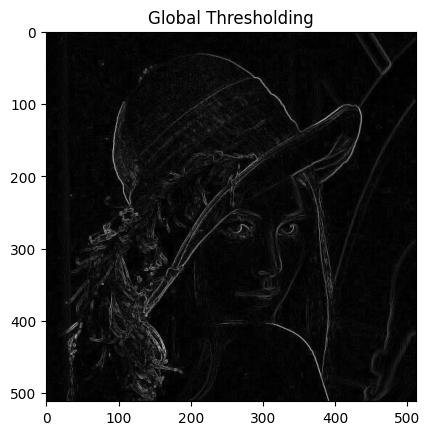

In [94]:
_, global_thresholded = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
plt.imshow(roberts_edge, cmap='gray')
plt.title("Global Thresholding")
plt.show()


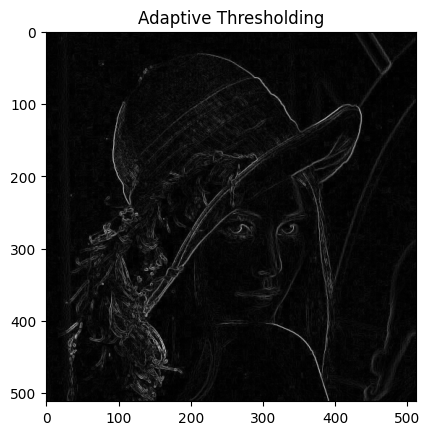

In [95]:
adaptive_thresholded = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 2)
plt.imshow(roberts_edge,cmap='gray')
plt.title("Adaptive Thresholding")
plt.show()

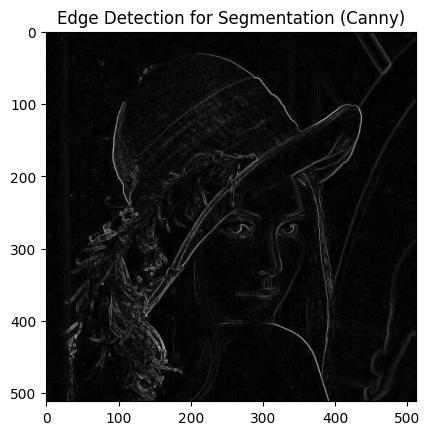

In [97]:
edges_for_segmentation = cv2.Canny(img_gray, 100, 200)  
plt.imshow(roberts_edge, cmap='gray')
plt.title("Edge Detection for Segmentation (Canny)")
plt.show()

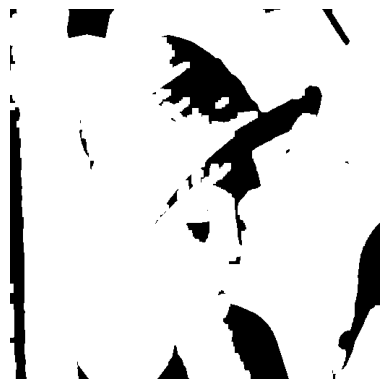

In [103]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, binary_image = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY_INV)

binary_image = np.uint8(binary_image)

kernel = np.ones((3, 3), np.uint8)

binary_image = cv2.dilate(binary_image, kernel, iterations=1)

sure_bg = cv2.dilate(binary_image, kernel, iterations=3)

dist_transform = cv2.distanceTransform(binary_image, cv2.DIST_L2, 5)

_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

sure_bg = np.uint8(sure_bg)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

plt.imshow(unknown, cmap='gray')
plt.axis('off')
plt.show()